In [4]:
#import ds libraries
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.shape

(7385, 12)

In [9]:
df.columns


Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [15]:
#df.Model
#df['Model']
#df[['Model']]
df[['Model','CO2 Emissions(g/km)']]

,Model,CO2 Emissions(g/km)
0,ILX,196
1,ILX,221
2,ILX HYBRID,136
3,MDX 4WD,255
4,RDX AWD,244
...,...,...
7380,XC40 T5 AWD,219
7381,XC60 T5 AWD,232
7382,XC60 T6 AWD,240
7383,XC90 T5 AWD,232


In [16]:
df.Model.unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [17]:
#count unique model
df.Model.nunique()

2053

In [18]:
#display per model count
df.Model.value_counts()

F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV               24
SONIC                   20
                        ..
AVENTADOR S ROADSTER     1
HURACAN AWD              1
HURACAN SPYDER AWD       1
LS 500                   1
XC40 T4 AWD              1
Name: Model, Length: 2053, dtype: int64

In [19]:
df.Model.value_counts().head(10)

F-150 FFV 4X4    32
F-150 FFV        32
MUSTANG          27
FOCUS FFV        24
SONIC            20
SONIC 5          20
F-150 4X4        20
F-150            20
ACCORD           19
COMPASS          19
Name: Model, dtype: int64

<Axes: >

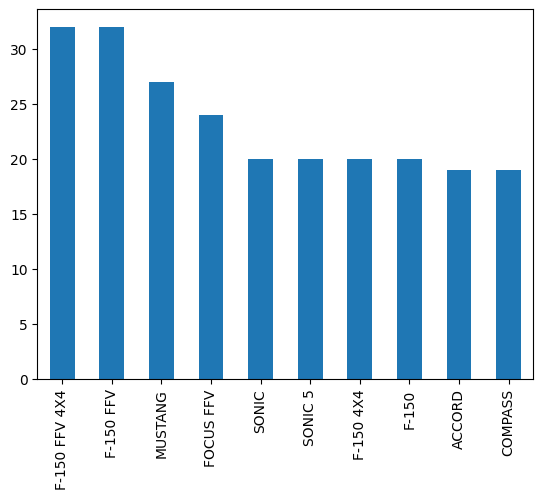

In [22]:
df.Model.value_counts().head(10).plot(kind='bar')

In [23]:
#sort model column A - Z
df.Model.sort_values()

3617    124 SPIDER
3618    124 SPIDER
4681    124 SPIDER
4680    124 SPIDER
6773    124 Spider
           ...    
2071            xB
940             xB
939             xB
942             xD
941             xD
Name: Model, Length: 7385, dtype: object

In [25]:
#select model starting with M
df[df.Model.str.startswith('M')]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
75,BENTLEY,MULSANNE,MID-SIZE,6.8,8,AS8,Z,22.3,14.9,19.0,15,437
118,BMW,M5,MID-SIZE,4.4,8,AM7,Z,17.3,11.5,14.7,19,338
119,BMW,M5,MID-SIZE,4.4,8,M6,Z,16.2,10.9,13.8,20,317
120,BMW,M6,COMPACT,4.4,8,AM7,Z,17.3,11.5,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7231,NISSAN,Maxima,MID-SIZE,3.5,6,AV7,Z,11.6,7.9,9.9,29,233
7232,NISSAN,Murano,STATION WAGON - MID-SIZE,3.5,6,AV7,X,11.7,8.3,10.2,28,240
7233,NISSAN,Murano AWD,STATION WAGON - MID-SIZE,3.5,6,AV7,X,11.7,8.5,10.3,27,242
7257,PORSCHE,Macan,SUV - SMALL,2.0,4,AM7,Z,12.2,10.2,11.3,25,264


In [27]:
df[df.Model.str.startswith('M')][['Model']]

,Model
3,MDX 4WD
75,MULSANNE
118,M5
119,M5
120,M6
...,...
7231,Maxima
7232,Murano
7233,Murano AWD
7257,Macan


In [30]:
#check datatype

df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [31]:
df.select_dtypes('object')

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z


In [32]:
#unique record count in each object columns
obj = df.select_dtypes('object').columns
obj


Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')

In [33]:
for col in obj:
  print(col ,':',df[col].nunique())

Make : 42
Model : 2053
Vehicle Class : 16
Transmission : 27
Fuel Type : 5


In [37]:
cnt = []
for col in obj:
  cnt.append(df[col].nunique())
  print(col ,':',df[col].nunique())

Make : 42
Model : 2053
Vehicle Class : 16
Transmission : 27
Fuel Type : 5


In [38]:
d = pd.DataFrame(data=obj)
d['unique'] = cnt
d

,0,unique
0,Make,42
1,Model,2053
2,Vehicle Class,16
3,Transmission,27
4,Fuel Type,5
